# Erem Ozdemir

## Research question/interests

Briefly describe your research question or interests here.

My instrest with this dataset is to understand the if there is a correlation between student percentiles and alchohol consumption. We assume that there's a negative correlation, as students with higher academic percentiles tend to study more during times that other students are partying.

### Task1 for milestone 3: EDA
#### There are 3 general steps for EDA

1. Understanding the variables
2. Cleaning your dataset
    - Variable Selection
    - Removing Outliers
    - Removing Rows with Null Values
3. Analyzing relationships between variables
    - Correlation Matrix
    - Scatterplot
    - Histogram
    - Boxplot


#### Import statements:

In [1]:
##conda install -c conda-forge/label/gcc7 missingno 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline


#### 1. Understanding the variables

In [19]:
df = pd.read_csv('../data/raw/student-mat.csv')
print(df.shape)
print(df.head())
print(df.columns)

# better understanding of the different values for each variable.
print(df.nunique(axis=0))
print(df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))
#looking at discrete variables (‘studytime’)
df.studytime.unique()
# Reclassify condition column
def clean_studytime(row):
    
    good = ['','fair']
    excellent = ['excellent','like new']       
    
    if row.studytime in good:
        return 'good'   
    if row.studytime in excellent:
        return 'excellent'    
    return row.studytime# Clean dataframe
def clean_df(playlist):
    df_cleaned = df.copy()
    df_cleaned['studytime'] = df_cleaned.apply(lambda row: clean_studytime(row), axis=1)
    return df_cleaned# Get df with reclassfied 'condition' column
df_cleaned = clean_df(df)
print(df_cleaned.studytime.unique())

(395, 34)
   Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0           1     GP   F   18       U     GT3       A     4     4  at_home   
1           2     GP   F   17       U     GT3       T     1     1  at_home   
2           3     GP   F   15       U     LE3       T     1     1  at_home   
3           4     GP   F   15       U     GT3       T     4     2   health   
4           5     GP   F   16       U     GT3       T     3     3    other   

   ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0  ...      4        3     4     1     1       3        6   5   6   6  
1  ...      5        3     3     1     1       3        4   5   5   6  
2  ...      4        3     2     2     3       3       10   7   8  10  
3  ...      3        2     2     1     1       5        2  15  14  15  
4  ...      4        3     2     1     2       5        4   6  10  10  

[5 rows x 34 columns]
Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize',

#### 2. Cleaning the dataset

##### a. Variable Selection

In [23]:
NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4):
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    
    col_passdf_cleaned = df_cleaned[na_filter(NA_val)]
    return col_passdf_cleaned

df_cleaned.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

##### b. Removing Outliers

In [27]:
df_cleaned = df_cleaned[df_cleaned['age'].between(15, 18)]
df_cleaned = df_cleaned[df_cleaned['freetime'] > 2 ]
df_cleaned = df_cleaned[df_cleaned['absences'] < 8]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,186.255708,16.410959,2.694064,2.579909,1.465753,2.054795,0.237443,4.045662,3.547945,3.187215,1.447489,2.237443,3.602740,2.187215,10.821918,10.726027,10.333333
std,115.320011,1.085800,1.118039,1.107422,0.724705,0.833206,0.682860,0.828238,0.671321,1.082225,0.818777,1.277277,1.401896,2.249693,3.263683,4.014630,4.942173
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,86.500000,15.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,173.000000,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,10.000000,11.000000,11.000000
75%,284.500000,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,4.000000,13.000000,14.000000,14.000000
max,394.000000,18.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,19.000000,19.000000,19.000000


##### c. Removing Rows with Null Values

In [24]:
df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape

(395, 34)

#### 3. Analyzing relationships between variables

#### a. Correlation Matrix

<AxesSubplot:>

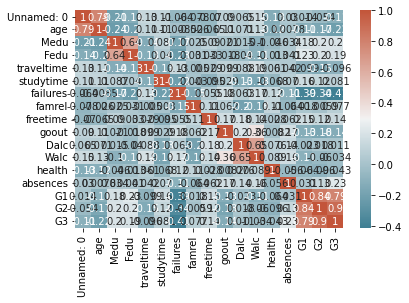

In [28]:
# calculate correlation matrix
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### b. Scatterplot

<AxesSubplot:xlabel='age', ylabel='failures'>

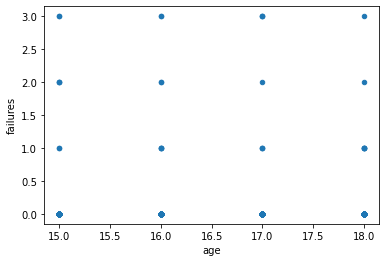

In [35]:
df_cleaned.plot(kind='scatter', x='age', y='failures')

#### c. Histogram

<AxesSubplot:ylabel='Frequency'>

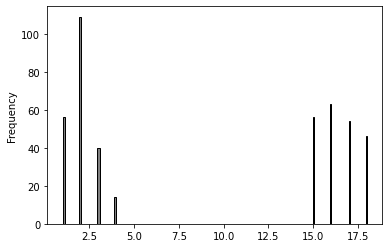

In [45]:
df_cleaned['age'].plot(kind='hist', bins=50, facecolor='grey',edgecolor='black')
df_cleaned['studytime'].plot(kind='hist', bins=20, facecolor='grey',edgecolor='black')

#### d. Boxplot

<AxesSubplot:>

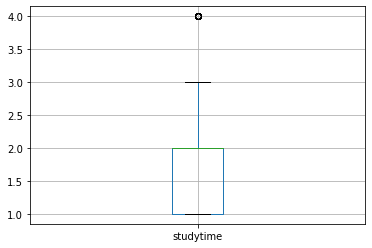

In [47]:
df_cleaned.boxplot('studytime')